
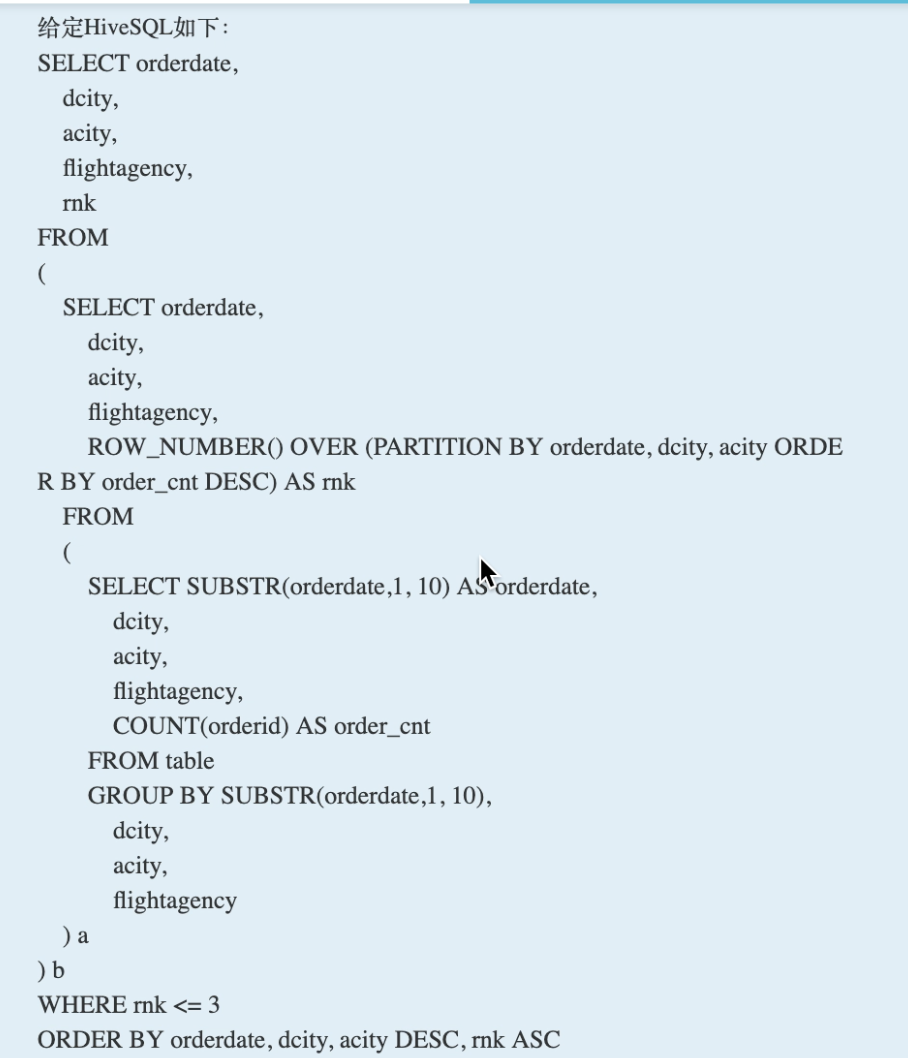  


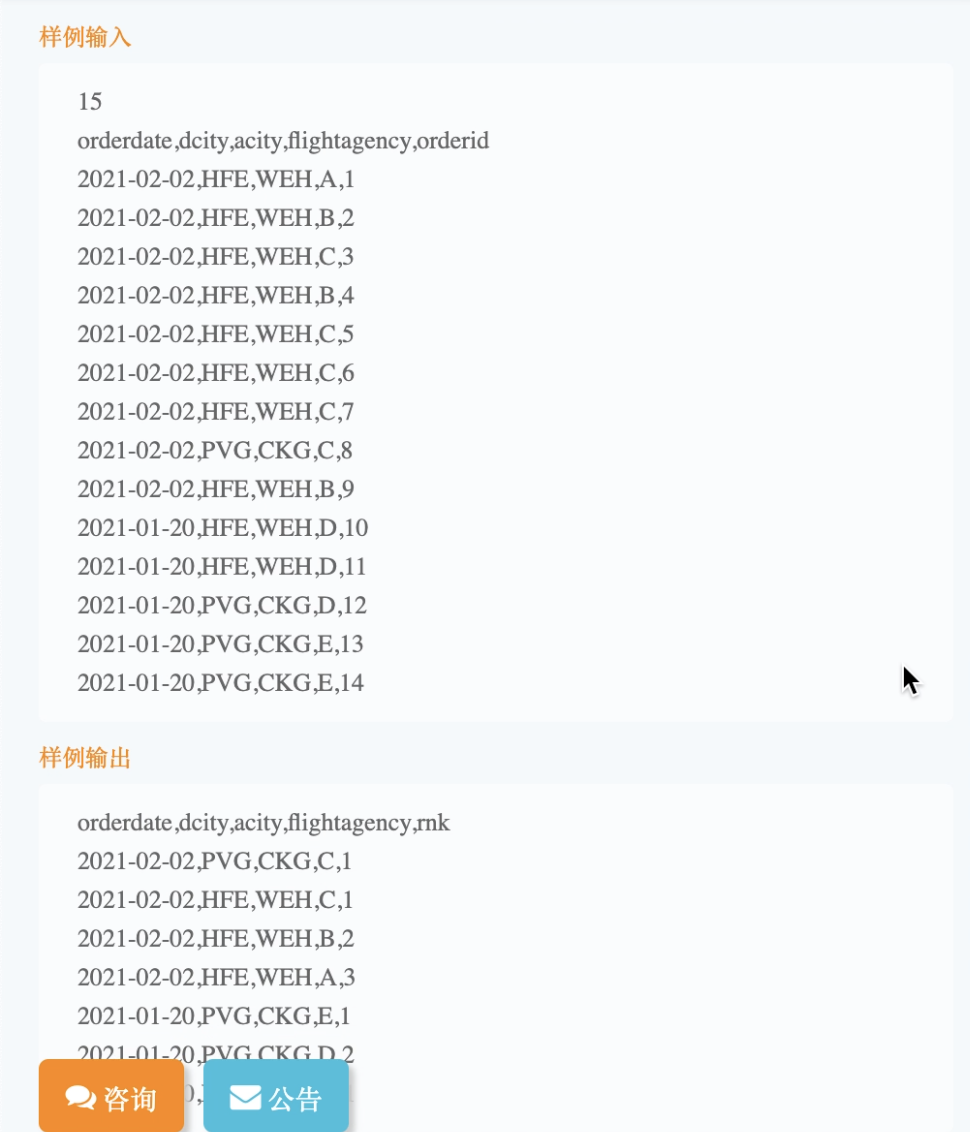  


In [1]:
# SQL逻辑编程实现--携程数分笔试题2
import pandas as pd
import numpy as np
a = ['20210101','20200301','20210303','20200301','20200301']
b = ['Boston', 'Newyork', 'Cambridge','Newyork','Newyork']
c = ['Massachuset', 'California', 'NewYork', 'California', 'California']
d = ['aa','bb','cc','bb','ee']
e = ['20iasf','asfa1','1r3fa','afa13','afa']
df = pd.DataFrame([a,b,c,d,e]).T
df.columns=['date','dcity','acity','flightagency', 'oderid']
# df: date, dcity, acity, flightagency, orderid
def orcnt(df):
    df = df.groupby(by = ['date', 'dcity', 'acity', 'flightagency']).count().reset_index()
    df.columns = ['date', 'dcity', 'acity', 'flightagency', 'order_cnt']
    df['rnk'] = df['order_cnt'].groupby([df['date'], df['dcity'], df['acity']]).rank(ascending = False)
    df = df[df['rnk']<=3]
    df = df[['date', 'dcity','acity','flightagency', 'rnk']]
    df = df.sort_values(by = 'acity', ascending = False).sort_values(by = 'rnk')
    return df
orcnt(df)

,date,dcity,acity,flightagency,rnk
3,20210303,Cambridge,NewYork,cc,1.0
2,20210101,Boston,Massachuset,aa,1.0
0,20200301,Newyork,California,bb,1.0
1,20200301,Newyork,California,ee,2.0
